In [1]:
# NASA/POWER CERES/MERRA2 Native Resolution Daily Data
# Dates (month/day/year): 01/01/1982 through 12/31/2023 
# Location: Latitude  5.5724   Longitude -0.2089
# Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 27.76 meters
# The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
# Parameter(s):
# T2M             MERRA-2 Temperature at 2 Meters (C) 
# T2MDEW          MERRA-2 Dew/Frost Point at 2 Meters (C)
# TS              MERRA-2 Earth Skin Temperature (C) 
# T2M_RANGE       MERRA-2 Temperature at 2 Meters Range (C)
# T2M_MAX         MERRA-2 Temperature at 2 Meters Maximum (C)
# T2M_MIN         MERRA-2 Temperature at 2 Meters Minimum (C)
# QV2M            MERRA-2 Specific Humidity at 2 Meters (g/kg) 
# RH2M            MERRA-2 Relative Humidity at 2 Meters (%) 
# PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/day) 
# PS              MERRA-2 Surface Pressure (kPa) 
# WS2M            MERRA-2 Wind Speed at 2 Meters (m/s) 
# WD2M            MERRA-2 Wind Direction at 2 Meters (Degrees) 
# WS10M           MERRA-2 Wind Speed at 10 Meters (m/s) 
# WD10M           MERRA-2 Wind Direction at 10 Meters (Degrees)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("rainfall_data.csv")

In [5]:
df

,YEAR,DOY,T2M,T2MDEW,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WD2M,WS10M,WD10M
0,1982,1,28.15,23.42,28.76,5.44,31.27,25.83,18.07,76.56,0.47,100.59,2.25,187.62,2.85,187.06
1,1982,2,27.83,23.73,28.35,5.06,30.97,25.90,18.43,79.31,1.50,100.49,2.64,212.56,3.35,212.44
2,1982,3,27.49,23.60,28.20,4.67,30.24,25.57,18.25,80.12,2.27,100.55,2.54,204.62,3.20,204.56
3,1982,4,27.58,23.45,28.21,4.59,30.21,25.62,18.07,79.06,1.96,100.58,2.45,211.75,3.09,211.81
4,1982,5,27.33,22.99,27.98,4.96,30.29,25.33,17.58,78.25,2.91,100.58,2.04,175.12,2.61,174.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15335,2023,361,28.93,25.26,29.69,4.64,31.65,27.02,20.02,81.00,1.83,100.75,1.98,175.94,2.49,174.44
15336,2023,362,28.60,24.54,29.18,3.28,30.44,27.16,19.17,78.88,2.58,100.90,2.15,195.56,2.68,194.81
15337,2023,363,29.15,24.12,29.69,4.62,31.82,27.19,18.68,74.62,0.38,100.82,2.05,184.88,2.60,184.06
15338,2023,364,28.97,24.83,29.70,4.67,31.71,27.04,19.53,78.81,0.85,100.76,2.47,205.44,3.11,205.25


In [31]:
print(df.keys())

Index(['YEAR', 'MO', 'DY', 'QV2M', 'RH2M', 'PRECTOTCORR', 'T2M', 'T2MDEW',
       'TS', 'T2M_MIN', 'T2M_MAX', 'PS', 'WS10M', 'WD10M', 'WS50M', 'WD50M'],
      dtype='object')


In [32]:
df.isnull().sum()

YEAR           0
MO             0
DY             0
QV2M           0
RH2M           0
PRECTOTCORR    0
T2M            0
T2MDEW         0
TS             0
T2M_MIN        0
T2M_MAX        0
PS             0
WS10M          0
WD10M          0
WS50M          0
WD50M          0
dtype: int64

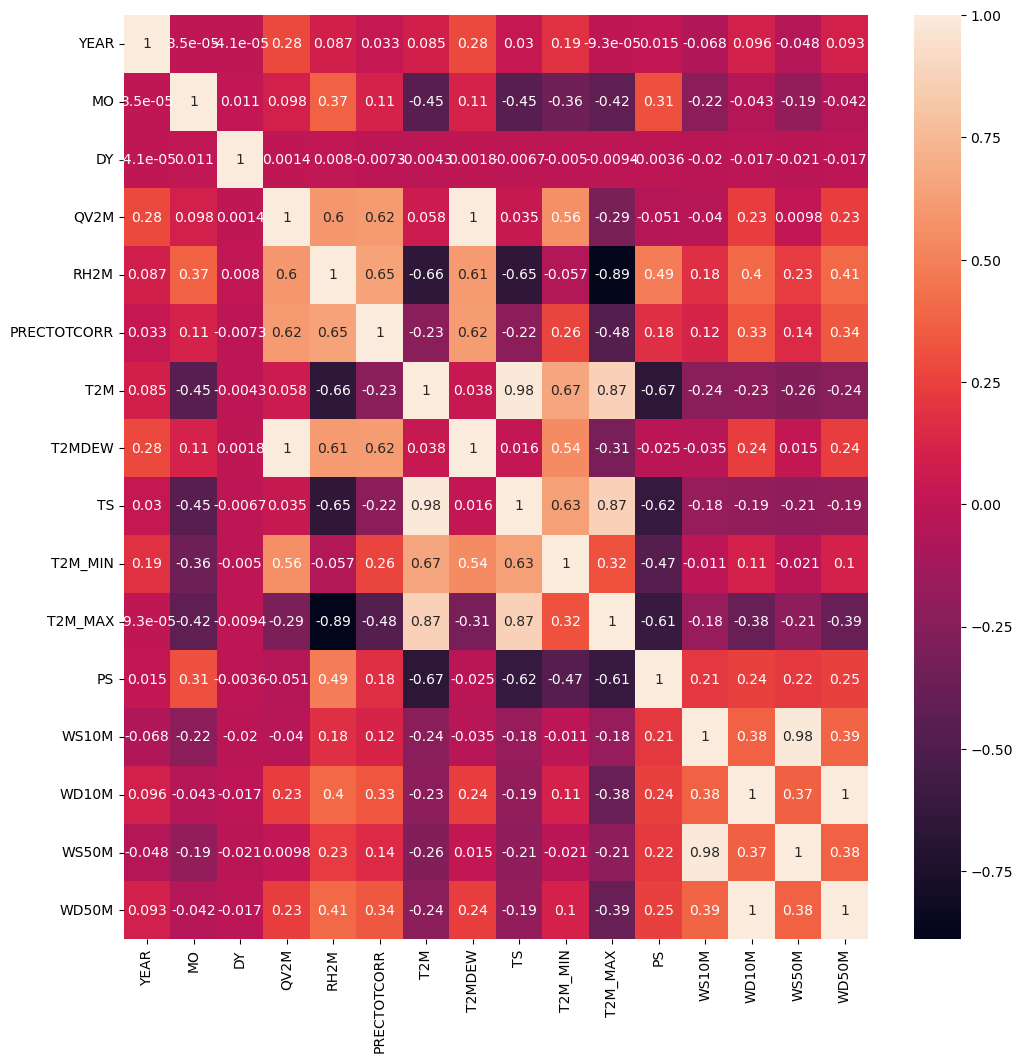

In [33]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error

In [35]:
x=df.drop(columns=['PRECTOTCORR'])
x.columns

Index(['YEAR', 'MO', 'DY', 'QV2M', 'RH2M', 'T2M', 'T2MDEW', 'TS', 'T2M_MIN',
       'T2M_MAX', 'PS', 'WS10M', 'WD10M', 'WS50M', 'WD50M'],
      dtype='object')

In [36]:
y=df['PRECTOTCORR']

In [37]:
train, test = train_test_split(df, random_state = 0)   #Default splitting train 75% test  25%

In [38]:
print(train.shape)
print(test.shape)

(11505, 16)
(3835, 16)


In [39]:
model_lr = LinearRegression().fit(train[x.columns], train['PRECTOTCORR'])
pred_lr = model_lr.predict(test[x.columns])

In [40]:
print("LR explained variance score:", round(explained_variance_score(test['PRECTOTCORR'], pred_lr), 2))
print("LR mean squared error:", round(mean_squared_error(test['PRECTOTCORR'], pred_lr), 2))

LR explained variance score: 0.23
LR mean squared error: 28.7


<AxesSubplot:title={'center':'Correlation Between True Values vs Predictions'}, xlabel='pred_lr', ylabel='PRECTOTCORR'>

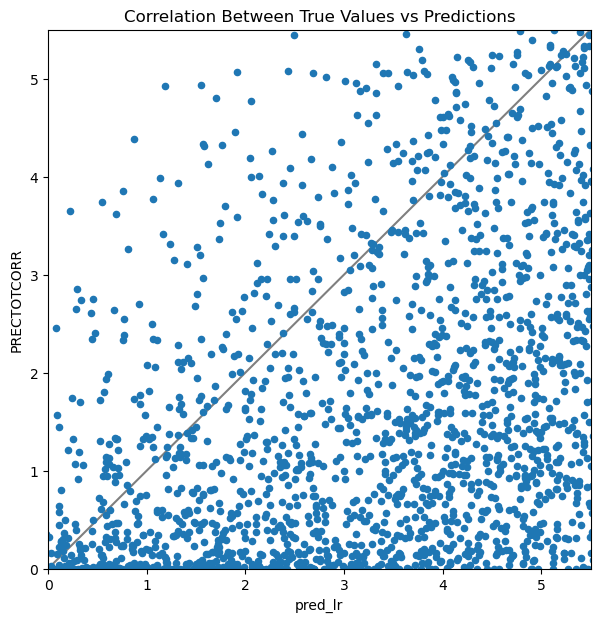

In [41]:
test["pred_lr"] = pred_lr

fig, ax = plt.subplots()

ax.plot([0,5.5], [0,5.5], "k-", alpha = 0.5, zorder = 0)
test.plot(
    x = "pred_lr", 
    y = "PRECTOTCORR", 
    kind = "scatter",
    figsize = (7,7), 
    title = "Correlation Between True Values vs Predictions",
    xlim = (0, 5.5),
    ylim = (0, 5.5),
    ax = ax
)

# Gradient Boosting

In [42]:
model_gbr = GradientBoostingRegressor(random_state = 0).fit(train[x.columns], train['PRECTOTCORR'])
pred_gbr = model_gbr.predict(test[x.columns])

In [43]:
print("GBR explained variance score:", round(explained_variance_score(test['PRECTOTCORR'], pred_gbr), 2))
print("GBR mean squared error:", round(mean_squared_error(test['PRECTOTCORR'], pred_gbr), 2))

GBR explained variance score: 0.31
GBR mean squared error: 25.6


<AxesSubplot:title={'center':'Correlation Between True Values vs Predictions'}, xlabel='pred_gbr', ylabel='PRECTOTCORR'>

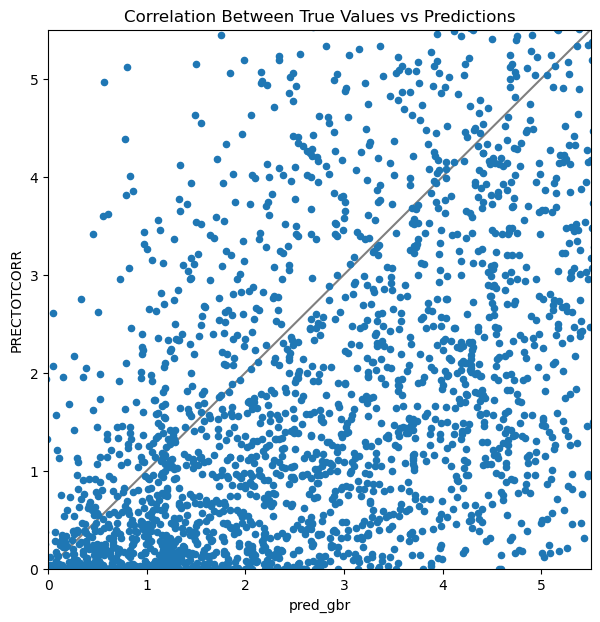

In [44]:
test["pred_gbr"] = pred_gbr

fig, ax = plt.subplots()

ax.plot([0,5.5], [0,5.5], "k-", alpha = 0.5, zorder = 0)
test.plot(
    x = "pred_gbr", 
    y = "PRECTOTCORR", 
    kind = "scatter",
    figsize = (7,7), 
    title = "Correlation Between True Values vs Predictions",
    xlim = (0, 5.5),
    ylim = (0, 5.5),
    ax = ax
)

# XGBoost


In [45]:
from xgboost import XGBRegressor
import xgboost as xgb
xgmodel=XGBRegressor(n_estimators=250,max_depth=2,gamma=0.2)
xgmodel.fit(train[x.columns], train['PRECTOTCORR'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
xgb_pred=xgmodel.predict(test[x.columns])

In [47]:
print("xgb explained variance score:", round(explained_variance_score(test['PRECTOTCORR'], xgb_pred), 2))
print("xgb mean squared error:", round(mean_squared_error(test['PRECTOTCORR'], xgb_pred), 2))

xgb explained variance score: 0.31
xgb mean squared error: 25.58


# Voting Regressor(Hybrid Model)

In [48]:
from sklearn.ensemble import VotingRegressor
vc=VotingRegressor([ ('model_lr',model_lr),('model_gbr',model_gbr),('xgmodel',xgmodel)],weights=[1,2,3])

In [49]:
vc.fit(train[x.columns], train['PRECTOTCORR'])
pred_vc = vc.predict(test[x.columns])

In [50]:
print("LR explained variance score:", round(explained_variance_score(test['PRECTOTCORR'], pred_lr), 2))
print("LR mean squared error:", round(mean_squared_error(test['PRECTOTCORR'], pred_lr), 2))
print("-----------")
print("GBR explained variance score:", round(explained_variance_score(test['PRECTOTCORR'], pred_gbr), 2))
print("GBR mean squared error:", round(mean_squared_error(test['PRECTOTCORR'], pred_gbr), 2))
print("-----------")
print("xgb explained variance score:", round(explained_variance_score(test['PRECTOTCORR'], xgb_pred), 2))
print("xgb mean squared error:", round(mean_squared_error(test['PRECTOTCORR'], xgb_pred), 2))
print("-----------")
print("vc explained variance score:", round(explained_variance_score(test['PRECTOTCORR'], pred_vc), 2))
print("vc mean squared error:", round(mean_squared_error(test['PRECTOTCORR'], pred_vc), 2))

LR explained variance score: 0.23
LR mean squared error: 28.7
-----------
GBR explained variance score: 0.31
GBR mean squared error: 25.6
-----------
xgb explained variance score: 0.31
xgb mean squared error: 25.58
-----------
vc explained variance score: 0.32
vc mean squared error: 25.1


<AxesSubplot:ylabel='Frequency'>

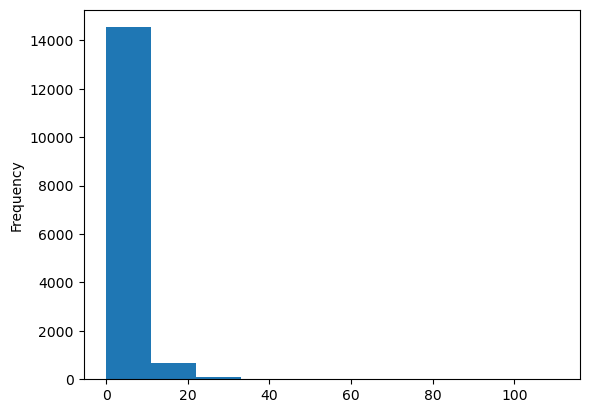

In [92]:
df['PRECTOTCORR'].plot(kind = "hist")

In [60]:
import pickle

In [61]:
pickle.dump(vc,open('votingmodel.pkl','wb'))

In [62]:
votingmodel=pickle.load(open('votingmodel.pkl','rb'))